In [292]:
import pandas as pd
import numpy as np

In [293]:
driver = pd.read_csv("driver_ids.csv")
rider = pd.read_csv("ride_ids.csv")
timestamps = pd.read_csv("ride_timestamps.csv")

In [294]:
rider.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [295]:
# Convert the seconds into mintues 
rider['duration_min'] = rider['ride_duration'].apply(lambda x: x / 60)


In [296]:
# Convert meters into miles 
rider['distance_mi'] = rider['ride_distance'].apply(lambda x: x *  0.00062137)

#rider['time_money'] = rider['duration_min'].apply(lambda x: x * 0.22 + 2 + 1.75)

In [297]:
# Calculate the value of the fare 
#rider['time_money'] = rider['time_money'].apply(lambda x: x if x >= 5 else 5)

In [298]:
def calculate_fare(duration, distance):
    return 2 + (.22*duration) + (1.15*distance) + 1.75

In [299]:
rider['fare_duration'] = rider['duration_min'].apply(lambda x: x * .22)

In [300]:
rider['fare_distance'] = rider['distance_mi'].apply(lambda x: x * 1.15)

In [301]:
rider.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,duration_min,distance_mi,fare_duration,fare_distance
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125301,1.199000,1.294096
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089046,2.966333,2.402403
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039336,2.097333,2.345237
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564898,12.239333,46.649632
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556938,3.017667,2.940478


In [302]:
rider['fare'] = rider['fare_duration'] + rider['fare_distance'] + 2 + 1.75

In [303]:
rider['fare'] = rider['fare'].apply(lambda x: x if x >= 5 else 5)

In [304]:
rider['fare'] = rider['fare'].apply(lambda x: x if x <= 400 else 400)

In [305]:
# This to make sure there are no repeats in drivers 
#driver.groupby(['driver_id']).count()

In [306]:
# Number of rides per driver_id
#rider.groupby(['driver_id']).count()


# Find the distribution of ride time per driver
#rider.groupby(['driver_id']).mean()
rider.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,duration_min,distance_mi,fare_duration,fare_distance,fare
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125301,1.199000,1.294096,6.243096
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089046,2.966333,2.402403,9.118736
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039336,2.097333,2.345237,8.192570
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564898,12.239333,46.649632,62.638966
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556938,3.017667,2.940478,9.708145


In [307]:
# Drop unneccessary columns
drive_sum = rider.drop(['ride_id', 'ride_distance', 'ride_duration', 'fare_duration', 'fare_distance'], axis = 1)
# Group the riders by the sum 
drive_sum = drive_sum.groupby(['driver_id'],as_index=False).sum()

# Rename the columns to let people know that it's the sum of all rides 
drive_sum = drive_sum.rename(columns={"ride_prime_time": "ride_prime_time_sum", "duration_min": "duration_min_sum", "distance_mi":"distance_mi_sum", "fare":"fare_sum"})
drive_sum.head()

,driver_id,ride_prime_time_sum,duration_min_sum,distance_mi_sum,fare_sum
0,002be0ffdc997bd5c50703158b7c2491,5375,3687.300000,1081.362133,3094.034448
1,007f0389f9c7b03ef97098422f902e62,625,341.616667,73.030237,275.486186
2,011e5c5dfc5c2c92501b8b24d47509bc,675,486.750000,167.554285,427.272427
3,0152a2f305e71d26cc964f8d4411add9,2050,2908.683333,914.183777,2409.441642
4,01674381af7edd264113d4e6ed55ecda,4700,5957.383333,1940.938672,4949.078240


In [308]:
# Drop unneccessary columns
drive_avg = rider.drop(['ride_id', 'ride_distance', 'ride_duration', 'fare_duration', 'fare_distance'], axis = 1)
# Group the riders by the sum 
drive_avg = drive_avg.groupby(['driver_id'],as_index=False).mean()

# Rename the columns to let people know that it's the sum of all rides 
drive_avg = drive_avg.rename(columns={"ride_prime_time": "ride_prime_time_avg", "duration_min": "duration_min_avg", "distance_mi":"distance_mi_avg", "fare":"fare_avg"})

drive_avg.head()

,driver_id,ride_prime_time_avg,duration_min_avg,distance_mi_avg,fare_avg
0,002be0ffdc997bd5c50703158b7c2491,19.404332,13.311552,3.903834,11.169799
1,007f0389f9c7b03ef97098422f902e62,20.161290,11.019892,2.355814,8.886651
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941,14.316176,4.928067,12.566836
3,0152a2f305e71d26cc964f8d4411add9,10.732984,15.228709,4.786302,12.614878
4,01674381af7edd264113d4e6ed55ecda,12.533333,15.886356,5.175836,13.197542


In [309]:
# create a new data frame to contain frequency of riders 
df = pd.DataFrame()

df = rider.groupby(['driver_id'], as_index=False).size()

df = df.to_frame().reset_index()
df = df.rename(columns= {0: 'rides'})



In [310]:
# Combine sum with frequency of the rides
combined = pd.merge(drive_sum,df,on = 'driver_id', how = 'inner')
combined.head()

,driver_id,ride_prime_time_sum,duration_min_sum,distance_mi_sum,fare_sum,rides
0,002be0ffdc997bd5c50703158b7c2491,5375,3687.300000,1081.362133,3094.034448,277
1,007f0389f9c7b03ef97098422f902e62,625,341.616667,73.030237,275.486186,31
2,011e5c5dfc5c2c92501b8b24d47509bc,675,486.750000,167.554285,427.272427,34
3,0152a2f305e71d26cc964f8d4411add9,2050,2908.683333,914.183777,2409.441642,191
4,01674381af7edd264113d4e6ed55ecda,4700,5957.383333,1940.938672,4949.078240,375


In [311]:
# Combine avg with frequency of the rides
combined = pd.merge(drive_avg,combined,on = 'driver_id', how = 'inner')
combined.head()

,driver_id,ride_prime_time_avg,duration_min_avg,distance_mi_avg,fare_avg,ride_prime_time_sum,duration_min_sum,distance_mi_sum,fare_sum,rides
0,002be0ffdc997bd5c50703158b7c2491,19.404332,13.311552,3.903834,11.169799,5375,3687.300000,1081.362133,3094.034448,277
1,007f0389f9c7b03ef97098422f902e62,20.161290,11.019892,2.355814,8.886651,625,341.616667,73.030237,275.486186,31
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941,14.316176,4.928067,12.566836,675,486.750000,167.554285,427.272427,34
3,0152a2f305e71d26cc964f8d4411add9,10.732984,15.228709,4.786302,12.614878,2050,2908.683333,914.183777,2409.441642,191
4,01674381af7edd264113d4e6ed55ecda,12.533333,15.886356,5.175836,13.197542,4700,5957.383333,1940.938672,4949.078240,375


In [312]:
# Combine sum dataframe with onboarding date
combined_date = pd.merge(combined,driver, on = 'driver_id', how = 'inner')
combined_date.head()

,driver_id,ride_prime_time_avg,duration_min_avg,distance_mi_avg,fare_avg,ride_prime_time_sum,duration_min_sum,distance_mi_sum,fare_sum,rides,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,19.404332,13.311552,3.903834,11.169799,5375,3687.300000,1081.362133,3094.034448,277,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,20.161290,11.019892,2.355814,8.886651,625,341.616667,73.030237,275.486186,31,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941,14.316176,4.928067,12.566836,675,486.750000,167.554285,427.272427,34,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,10.732984,15.228709,4.786302,12.614878,2050,2908.683333,914.183777,2409.441642,191,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,12.533333,15.886356,5.175836,13.197542,4700,5957.383333,1940.938672,4949.078240,375,2016-04-29 00:00:00


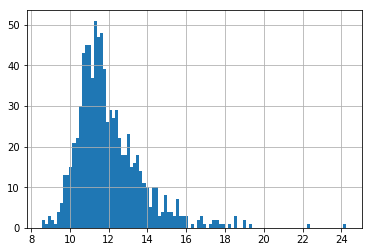

In [313]:
# Histogram of the average fare 
hist = combined_date['fare_avg'].hist(bins=100)

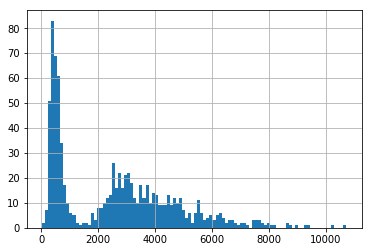

In [314]:
# Histogram of the sum of the fare
hist = combined_date['fare_sum'].hist(bins=100)

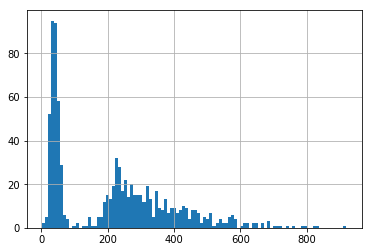

In [315]:
# Histogram of the number of rides 
hist = combined_date['rides'].hist(bins=100)

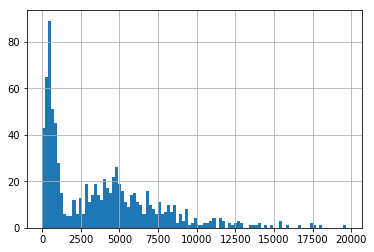

In [316]:
hist = combined_date['ride_prime_time_sum'].hist(bins=100)

In [317]:
# Add change the date string into a date object 
# combined_date['driver_onboard_date_object'] = combined_date['driver_onboard_date'].apply(lambda date: date[:10])
# combined_date['driver_onboard_date_object'] = combined_date['driver_onboard_date_object'].apply(pd.to_datetime)

combined_date['driver_onboard_datetime'] = pd.to_datetime(combined_date['driver_onboard_date'])

# Set index as the date
# combined_date = combined_date.set_index('driver_onboard_datetime')

# Drop the og column 
combined_date.drop(['driver_onboard_date'], axis=1, inplace=True)

# Preview the first couple of rows 
combined_date.head()

,driver_id,ride_prime_time_avg,duration_min_avg,distance_mi_avg,fare_avg,ride_prime_time_sum,duration_min_sum,distance_mi_sum,fare_sum,rides,driver_onboard_datetime
0,002be0ffdc997bd5c50703158b7c2491,19.404332,13.311552,3.903834,11.169799,5375,3687.300000,1081.362133,3094.034448,277,2016-03-29
1,007f0389f9c7b03ef97098422f902e62,20.161290,11.019892,2.355814,8.886651,625,341.616667,73.030237,275.486186,31,2016-03-29
2,011e5c5dfc5c2c92501b8b24d47509bc,19.852941,14.316176,4.928067,12.566836,675,486.750000,167.554285,427.272427,34,2016-04-05
3,0152a2f305e71d26cc964f8d4411add9,10.732984,15.228709,4.786302,12.614878,2050,2908.683333,914.183777,2409.441642,191,2016-04-23
4,01674381af7edd264113d4e6ed55ecda,12.533333,15.886356,5.175836,13.197542,4700,5957.383333,1940.938672,4949.078240,375,2016-04-29


In [318]:
# Understand the type of data in the dataframe
# combined_date.info()

earliest_onboard = combined_date['driver_onboard_datetime'].sort_values(ascending= True)[0]
print(earliest_onboard)

latest_onboard = combined_date['driver_onboard_datetime'].sort_values(ascending= False)[752]
print(latest_onboard)

2016-03-29 00:00:00
2016-05-15 00:00:00


# Sally pay attention here lol

In [319]:
# Pivot based on ride id and event 
timestamps.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [320]:
# pivot the timestamps
pivot_timestamps = timestamps.pivot(index='ride_id', columns='event', values='timestamp')
pivot_timestamps.count()

event
accepted_at       194081
arrived_at        194080
dropped_off_at    194081
picked_up_at      194081
requested_at      194081
dtype: int64

In [321]:
# Preview the rides and the time stamp of each action 
pivot_timestamps.head()

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09
00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36
0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:12:15,2016-04-26 18:16:52,2016-04-26 18:24:14,2016-04-26 18:16:55,2016-04-26 18:11:38


In [322]:
ride_matches = rider[['driver_id','ride_id']]
ride_matches.head()

,driver_id,ride_id
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981


In [325]:
# merged the two data frames 
pivot_timestamps_driver = pd.merge(pivot_timestamps,ride_matches,on = 'ride_id', how = 'inner')
pivot_timestamps_driver.head()

,ride_id,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,driver_id
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b
1,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21,0656192a402808805282e60761bda088
2,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09,c468a648519cd42da75e6aa9dadf733e
3,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36,689bdf87fb2de49f98bf4946cfaa5068
4,00012759befd5d34a0609800f6a1ee59,2016-05-31 15:45:05,2016-05-31 15:46:22,2016-05-31 15:59:26,2016-05-31 15:46:23,2016-05-31 15:44:56,eece82fe623b4bb335a9b9e20eb0ca54


In [324]:
# Reorder the columns
pivot_timestamps_driver = pivot_timestamps_driver['driver_id', 'ride_id', 'requested_at', 'accepted_at', 'arrived_at', 'picked_up_at', 'dropped_off_at']
pivot_timestamps_driver.head()



,ride_id,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,driver_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
